# U.S. Medical Insurance Costs
In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [27]:
#import csv and matplotlib libraries
import csv
from matplotlib import pyplot as plt

To start, all necessary libraries must be imported. For this project the libraries needed are the `csv` and `matplotlib` libraries in order to work with the **insurance.csv** data. There are other potential libraries that could help with this project; however, for this analysis, using just the `csv`and `matplotlib` libraries will suffice.

The next step is to open the `csv` file and save it as a list to enable to check if they are empty data sets and what the columns of the data are and the number of rows in the data.

In [28]:
#function to download data from the csv file
def download_file(csv_file):
    downloaded_data = []
    with open(csv_file, newline='') as insurance_csv:
        insurance_file = csv.DictReader(insurance_csv)
        for row in insurance_file:
            downloaded_data.append(row)
    return downloaded_data

#function to determine the number of rows
# each column should ideally have same number of rows of data
def num_rows_in_file(downloaded_data):
    count = 0
    for row in downloaded_data:
        count += 1
    print ('The number of rows is ' + str(count) + '.')
    
#names of columns
def column_names(downloaded_data):
    keys = []
    for row in downloaded_data:
        pass
    for key in row:
        keys.append(key)
    print(keys)
    

In [29]:
insurance_data = download_file('insurance.csv')
data_count = num_rows_in_file(insurance_data)
names_columns = column_names(insurance_data)

The number of rows is 1338.
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


**insurance.csv** contains the following columns:

+ Patient Age
+ Patient Sex
+ Patient BMI
+ Patient Number of Children
+ Patient Smoking Status
+ Patient U.S Geopraphical Region
+ Patient Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.

In [30]:
Age = []
Sex = []
Bmi = []
Children = []
Smoker = []
Region = []
Charges = []

A function will created to automate the creation of lists taht contain data for each of the columns in the **insurance.csv** file.

In [31]:
def create_lst(lst, data_file, column_name):
    for data in data_file:
        lst.append(data[column_name])
    return lst

In [32]:
AGE = create_lst(Age, insurance_data, 'age')
SEX = create_lst(Sex, insurance_data, 'sex')
BMI = create_lst(Bmi, insurance_data, 'sex')
CHILDREN = create_lst(Children, insurance_data, 'children')
SMOKER = create_lst(Smoker, insurance_data, 'smoker')
REGION = create_lst(Region, insurance_data, 'region')
Cost_of_insurance = create_lst(Charges, insurance_data, 'charges')

Now that all the data from **insurance.csv** neatly organized into labeled lists, the analysis can be started. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find average age of the patients
* plot the number of males vs. females counted in the dataset
* plot geographical location of the patients
* return the average yearly medical charges of the patients


To perform these inspections, a class called `PatientsInfo` has been built out which contains fives methods:
* `analyze_ages()`
* `analyze_sexes()`
* `unique_regions()`
* `average_charges()`


The class has been built out below. 

In [42]:
class PatientsInfo:
    def __init__(self, ages, sexes, bmis, num_children, smokers, regions, insurance_charges):
        self.ages = ages
        self.sexes = sexes
        self.bmis = bmis
        self.num_children = num_children
        self.smokers = smokers
        self.regions = regions
        self.insurance_charges = insurance_charges
        self.count_dict = {}
        
    # method to compute the average age in the insurance data
    def analyze_ages(self):
        total_age = 0
        for age in self.ages:
            total_age += int(age)
        average_age = round(total_age/len(self.ages), 2)
        print("Average insured age is " + str(average_age) + ' years.')
         
    
    # methode to compute the average cost of insurance
    def average_charges(self):
        total_cost = 0
        for cost in self.insurance_charges:
            total_cost += float(cost)
        average_cost = round(total_cost/len(self.insurance_charges), 2)
        print("The average monthly medical insurance charges is " + str(average_cost) + ' dollars.')
     
    
    # plotting the unique regions
    def analyze_sexes(self):
        sex_dict = {}
        x_sex = []
        y_sex =[]
        for sex in self.sexes:
            sex_dict[sex] = self.sexes.count(sex)
        for key in sex_dict:
            x_sex.append(key)
            y_sex.append(sex_dict[key])
        p1 = plt.bar(x_sex, y_sex, width=0.4, edgecolor='white', linewidth=0.5, color='red')
        plt.xlabel('Sexes')
        plt.ylabel('Number of Insured')
        plt.title("Simple Bar Chart Showing Males & Females")
        plt.bar_label(p1, labels=y_sex, label_type='center')
        return plt.show()
        
    # method for analyzing unique regions
    def unique_regions(self):
        region_dict = {}
        x_region = []
        y_region =[]
        for region in self.regions:
            region_dict[region] = self.regions.count(region)
        for key in region_dict:
            x_region.append(key)
            y_region.append(region_dict[key])
        p1 = plt.bar(x_region, y_region, width=0.4, edgecolor='white', linewidth=0.5, color='blue')
        plt.xlabel('Regions')
        plt.ylabel('Number of Insured')
        plt.title("Simple Bar Chart Showing The Regional Distribution")
        plt.bar_label(p1, labels=y_region, label_type='center')
        plt.show() 

In [43]:
# instantiating PatientsInfo
insured_data = PatientsInfo(AGE, SEX, BMI, CHILDREN, SMOKER, REGION, Cost_of_insurance)

In [44]:
# What is the average of the insurers in the data?
insured_average_age = insured_data.analyze_ages()


# What is the average cost of insurance per month?
average_cost_insurance = insured_data.average_charges()


Average insured age is 39.21 years.
The average monthly medical insurance charges is 13270.42 dollars.


The average age of the patients in **insurance.csv** is about 39 years old. This is important to check in order to ensure the data in **insurance.csv** is representative for a broader population. The average yearly medical insurance charge per individual is 13270 US dollars.

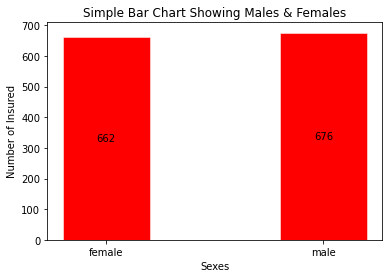

In [47]:
# What is number of males and females insured?
# Graphical Representation of Males and Females Distribution
p1 = insured_data.analyze_sexes()

The graph shows the distribution of males and females in **insurance.csv** is fairly split down the middle, that is Males are **676** and females are **662**. This is important to check in order to ensure the data in **insurance.csv** is representative for a broader population.

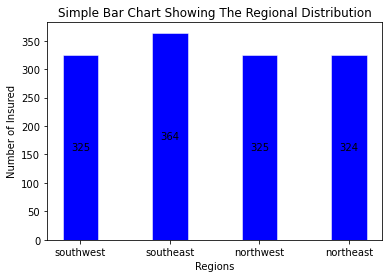

In [48]:
# What is the Regional Distribution of the US Medical Insurance Data?
# Graphical Representation of the Distribution
p2 = insured_data.unique_regions()